## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('gz2_hart16.csv')

### Anaylze columns

In [5]:
print(f'Table shape: {df.shape[0]} rows, {df.shape[1]} columns.')
df.head()

Table shape: 239695 rows, 234 columns.


ra        dec     rastring    decstring    sample gz2_class  \
0  179.042984  60.522518  11:56:10.32  +60:31:21.1  original      Sc+t   
1  135.084396  52.494240  09:00:20.26  +52:29:39.3  original      Sb+t   
2  183.371979  50.741508  12:13:29.27  +50:44:29.4  original        Ei   
3  186.251953  28.558598  12:25:00.47  +28:33:31.0  original      Sc+t   
4  161.086395  14.084465  10:44:20.73  +14:05:04.1  original        Er   

   total_classifications  total_votes  \
0                     45          342   
1                     42          332   
2                     36          125   
3                     28          218   
4                     43          151   

   t01_smooth_or_features_a01_smooth_count  \
0                                        0   
1                                        1   
2                                       28   
3                                        1   
4                                       33   

   t01_smooth_or_features_a01_smooth_weight  ...  \
0                                       0.0  ...   
1                                       1.0  ...   
2                                      28.0  ...   
3                                       1.0  ...   
4                                      33.0  ...   

   t11_arms_number_a37_cant_tell_count  t11_arms_number_a37_cant_tell_weight  \
0                                   16                                  16.0   
1                                   13                                  13.0   
2                                    0                                   0.0   
3                                    6                                   6.0   
4                                    0                                   0.0   

   t11_arms_number_a37_cant_tell_fraction  \
0                                   0.400   
1                                   0.317   
2                                   0.000   
3                                   0.240   
4                                   0.000   

   t11_arms_number_a37_cant_tell_weighted_fraction  \
0                                            0.400   
1                                            0.323   
2                                            0.000   
3                                            0.240   
4                                            0.000   

   t11_arms_number_a37_cant_tell_debiased  t11_arms_number_a37_cant_tell_flag  \
0                                0.394506                                   0   
1                                0.322743                                   0   
2                                0.000000                                   0   
3                                0.239765                                   0   
4                                0.000000                                   0   

   label1  asset_id_x  asset_id_y  asset_id  
0     5.0       58957       58957     58957  
1     5.0      193641      193641    193641  
2     1.0       55934       55934     55934  
3     5.0      158501      158501    158501  
4     0.0      110939      110939    110939  

[5 rows x 234 columns]

In [8]:
def display_classes(gz2_class_column):
    print(f'There are {len(set(gz2_class_column))} unique classes')
    for i, item in enumerate(gz2_class_column, 1):
        print(item, end=' ')

        if (i % 15 == 0):
            print('\n')

In [10]:
display_classes(df.gz2_class)

There are 818 unique classes
Sc+t Sb+t Ei Sc+t Er Ei Ei Sb+t Ei Sb?t Er Ei Er Er Ei 

Sb1m(i) Ei Sb?t Er Ei Er Er Er Sb2t Er Sb2t Ei Sb?t Er Er 

Er Ei Ei Er SBb2m Er Er Ei SBc3m Er Sc2t Sb2t Ei Sb(d) Sb3t 

Er Er Ei Ei Ei Er Er Ei Er Ei Er Ei Sb?t Ec Er 

Ei Sb3m Er(o) Ei Er Er Er Er SBc(r) Ei Ei Ei Sc2t Er Sb 

Ei Ei Sb+t Er Ei(r) Ser Ei(m) Ec Ei Er SBb2m Ei Sc+t Sb3m Ei(r) 

SBb+t Sc2m Er Sb?t(r) Sb1m(d) Er Ei Ser Er Er Sc3t Ei Er Ei SBb?t(m) 

Ei Er(o) Ei Ei Er Er Sc(u) Ser(u) Er Er Er SBc2m Er Ei Er 

Er Ei Sb?t(r) Ser(m) Ei(m) Er Sc+t Ei Sb?t Sb?t Er SBb2t Ei Sc?t(r) Er 

Ei Sb3t Sb?t(d) Ei Er Ei Ei Ei Ei Ei Ei Sb?t Ei Sb?t Sb?m(r) 

Er Ei Ei Ei Ei Ei Sb?m Ei Ei Er Ei(o) Er SBb4t SBb2m SBb2t 

Er Ei Er Ser(o) Ei Sb?t Er Er Er Er Er Ser Ei Ei Er 

Ei SBb2t Er Er SBb?t SBc2t SBb2l(i) Er Sb?t(i) Er Sb(r) Sb2l(m) SBb2m Er Ei 

SBb2m(r) Er Ei Sb(r) SBb2t Ei SBb2m Ei(m) Sb2t Sc4m(m) Er SBc2m Ei Sb?t Ei 

Er Ei Ei Er Er Ei Ec Er SBc2l Er SBb2m Sc?t Er Er Ser 

Er Ei SBb2m SBb(r) Sc?t Sc

### Classification Criterias

In [12]:
df.loc[( (df.t01_smooth_or_features_a01_smooth_debiased >=0.469) & (df.t07_rounded_a16_completely_round_debiased >=0.5) & (df.t06_odd_a15_no_debiased >= 0.5) ), 'label1'] = 0

In [14]:
df_class0 = df[df.label1==0].copy()
df_class0

ra        dec     rastring    decstring    sample gz2_class  \
4       161.086395  14.084465  10:44:20.73  +14:05:04.1  original        Er   
10      152.301804  15.005116  10:09:12.43  +15:00:18.4  original        Er   
12      224.865158  16.645098  14:59:27.64  +16:38:42.4  original        Er   
13      175.636871  26.488888  11:42:32.85  +26:29:20.0  original        Er   
18      209.473053  64.910980  13:57:53.53  +64:54:39.5  original        Er   
...            ...        ...          ...          ...       ...       ...   
239655  344.763336  -0.329441  22:59:03.20  +00:19:46.0  stripe82        Er   
239660   46.604069  -0.551216  03:06:24.98  +00:33:04.4  stripe82        Er   
239674  178.179733  29.317156  11:52:43.14  +29:19:01.8  original        Er   
239684  167.420471  18.718920  11:09:40.91  +18:43:08.1  original        Er   
239686  220.151138   3.538694  14:40:36.27  +03:32:19.3  original        Er   

        total_classifications  total_votes  \
4                          43          151   
10                         51          191   
12                         35          119   
13                         49          166   
18                         35          102   
...                       ...          ...   
239655                     42          144   
239660                     41          130   
239674                     42          134   
239684                     49          196   
239686                     42          150   

        t01_smooth_or_features_a01_smooth_count  \
4                                            33   
10                                           38   
12                                           31   
13                                           45   
18                                           26   
...                                         ...   
239655                                       32   
239660                                       34   
239674                                       38   
239684                                       33   
239686                                       33   

        t01_smooth_or_features_a01_smooth_weight  ...  \
4                                      33.000000  ...   
10                                     37.342999  ...   
12                                     31.000000  ...   
13                                     45.000000  ...   
18                                     26.000000  ...   
...                                          ...  ...   
239655                                 31.150000  ...   
239660                                 34.000000  ...   
239674                                 38.000000  ...   
239684                                 33.000000  ...   
239686                                 33.000000  ...   

        t11_arms_number_a37_cant_tell_count  \
4                                         0   
10                                        0   
12                                        0   
13                                        0   
18                                        0   
...                                     ...   
239655                                    1   
239660                                    0   
239674                                    0   
239684                                    1   
239686                                    0   

        t11_arms_number_a37_cant_tell_weight  \
4                                        0.0   
10                                       0.0   
12                                       0.0   
13                                       0.0   
18                                       0.0   
...                                      ...   
239655                                   1.0   
239660                                   0.0   
239674                                   0.0   
239684                                   1.0   
239686                                   0.0   

        t11_arms_number_a37_cant_tell_fraction  \
4                       

In [16]:
df.loc[( (df.t01_smooth_or_features_a01_smooth_debiased >=0.469) & (df.t07_rounded_a17_in_between_debiased >=0.5) & (df.t06_odd_a15_no_debiased >= 0.5) ), 'label1'] = 1
df_class1 = df[df.label1==1].copy()
df_class1

ra        dec     rastring    decstring    sample gz2_class  \
2       183.371979  50.741508  12:13:29.27  +50:44:29.4  original        Ei   
5       246.921387  40.926968  16:27:41.13  +40:55:37.1     extra        Ei   
6       249.474640  36.073040  16:37:53.91  +36:04:22.9  original        Ei   
8       195.278030  39.841473  13:01:06.73  +39:50:29.3  original        Ei   
11      119.617126  37.786617  07:58:28.11  +37:47:11.8  original        Ei   
...            ...        ...          ...          ...       ...       ...   
239673  142.053253  37.672295  09:28:12.78  +37:40:20.3     extra        Ei   
239677  123.369202  27.326279  08:13:28.61  +27:19:34.6  original        Ei   
239682  226.073853  48.919765  15:04:17.72  +48:55:11.2  original        Ei   
239687  118.103683  23.507954  07:52:24.88  +23:30:28.6  original        Ei   
239692   21.690212  -0.546427  01:26:45.65  +00:32:47.1  stripe82        Ei   

        total_classifications  total_votes  \
2                          36          125   
5                          48          154   
6                          39          142   
8                          50          158   
11                         42          139   
...                       ...          ...   
239673                     34          112   
239677                     45          155   
239682                     43          156   
239687                     40          113   
239692                     48          164   

        t01_smooth_or_features_a01_smooth_count  \
2                                            28   
5                                            41   
6                                            25   
8                                            42   
11                                           39   
...                                         ...   
239673                                       27   
239677                                       38   
239682                                       32   
239687                                       32   
239692                                       36   

        t01_smooth_or_features_a01_smooth_weight  ...  \
2                                      28.000000  ...   
5                                      41.000000  ...   
6                                      25.000000  ...   
8                                      42.000000  ...   
11                                     39.000000  ...   
...                                          ...  ...   
239673                                 27.000000  ...   
239677                                 38.000000  ...   
239682                                 32.000000  ...   
239687                                 32.000000  ...   
239692                                 35.366001  ...   

        t11_arms_number_a37_cant_tell_count  \
2                                         0   
5                                         0   
6                                         0   
8                                         0   
11                                        0   
...                                     ...   
239673                                    0   
239677                                    0   
239682                                    1   
239687                                    0   
239692                                    2   

        t11_arms_number_a37_cant_tell_weight  \
2                                        0.0   
5                                        0.0   
6                                        0.0   
8                                        0.0   
11                                       0.0   
...                                      ...   
239673                                   0.0   
239677                                   0.0   
239682                                   1.0   
239687                                   0.0   
239692                                   2.0   

        t11_arms_number_a37_cant_tell_fraction  \
2                       

In [18]:
df.loc[( (df.t01_smooth_or_features_a01_smooth_debiased>=0.469) & (df.t07_rounded_a18_cigar_shaped_debiased >=0.5) & (df.t06_odd_a15_no_debiased >= 0.5) ), 'label1'] = 2
df_class2 = df[df.label1==2].copy()
df_class2

ra        dec     rastring    decstring    sample gz2_class  \
58      240.400726  12.360189  16:01:36.17  +12:21:36.7  original        Ec   
82      243.740982  21.938412  16:14:57.84  +21:56:18.3  original        Ec   
216     250.405685  40.163506  16:41:37.36  +40:09:48.6  original        Ec   
292     186.354630  16.124180  12:25:25.11  +16:07:27.0  original        Ec   
324     165.657318  59.125290  11:02:37.76  +59:07:31.0  original        Ec   
...            ...        ...          ...          ...       ...       ...   
239685  149.925385  20.729364  09:59:42.09  +20:43:45.7     extra        Ec   
239688  173.478195  28.623381  11:33:54.77  +28:37:24.2  original        Ec   
239689  125.736557  21.344851  08:22:56.77  +21:20:41.5     extra        Ec   
239690  167.542648  28.991867  11:10:10.23  +28:59:30.7     extra        Ec   
239694   48.130630  -1.112244  03:12:31.35  -01:06:44.1  stripe82        Ec   

        total_classifications  total_votes  \
58                         49          176   
82                         34          125   
216                        44          151   
292                        39          153   
324                        47          178   
...                       ...          ...   
239685                     42          144   
239688                     42          133   
239689                     43          166   
239690                     42          135   
239694                     49          170   

        t01_smooth_or_features_a01_smooth_count  \
58                                           24   
82                                           21   
216                                          32   
292                                          22   
324                                          34   
...                                         ...   
239685                                       25   
239688                                       36   
239689                                       28   
239690                                       34   
239694                                       36   

        t01_smooth_or_features_a01_smooth_weight  ...  \
58                                     24.000000  ...   
82                                     21.000000  ...   
216                                    32.000000  ...   
292                                    22.000000  ...   
324                                    34.000000  ...   
...                                          ...  ...   
239685                                 25.000000  ...   
239688                                 36.000000  ...   
239689                                 27.325001  ...   
239690                                 33.134998  ...   
239694                                 36.000000  ...   

        t11_arms_number_a37_cant_tell_count  \
58                                        0   
82                                        0   
216                                       0   
292                                       0   
324                                       0   
...                                     ...   
239685                                    0   
239688                                    0   
239689                                    0   
239690                                    0   
239694                                    0   

        t11_arms_number_a37_cant_tell_weight  \
58                                       0.0   
82                                       0.0   
216                                      0.0   
292                                      0.0   
324                                      0.0   
...                                      ...   
239685                                   0.0   
239688                                   0.0   
239689                                   0.0   
239690                                   0.0   
239694                                   0.0   

        t11_arms_number_a37_cant_tell_fraction  \
58                      

In [20]:
df.loc[( (df.t01_smooth_or_features_a02_features_or_disk_debiased >=0.430) & (df.t02_edgeon_a04_yes_debiased >=0.602) & (df.t06_odd_a15_no_debiased >=0.5) ), 'label1'] = 3
df_class3 = df[df.label1==3].copy()
df_class3

ra        dec     rastring    decstring    sample gz2_class  \
97      206.412247  56.616508  13:45:38.94  +56:36:59.4  original       Ser   
176     243.569687  17.757439  16:14:16.72  +17:45:26.8  original       Ser   
224     197.148468  33.975834  13:08:35.63  +33:58:33.0  original       Ser   
235     225.568130  11.917587  15:02:16.35  +11:55:03.3  original       Ser   
236     170.266235  34.343945  11:21:03.90  +34:20:38.2  original       Ser   
...            ...        ...          ...          ...       ...       ...   
239610  124.305573  38.012562  08:17:13.34  +38:00:45.2  original        Ec   
239611  169.989822  30.576523  11:19:57.56  +30:34:35.5  original       Sen   
239636  183.217789  48.305874  12:12:52.27  +48:18:21.1     extra        Ec   
239647  204.915375  16.408674  13:39:39.69  +16:24:31.2     extra       Sen   
239672  135.925339  12.250283  09:03:42.08  +12:15:01.0  original       Ser   

        total_classifications  total_votes  \
97                         44          165   
176                        48          228   
224                        30          116   
235                        46          195   
236                        35          135   
...                       ...          ...   
239610                     49          169   
239611                     39          150   
239636                     36          123   
239647                     40          150   
239672                     54          187   

        t01_smooth_or_features_a01_smooth_count  \
97                                            3   
176                                           8   
224                                           8   
235                                           1   
236                                           3   
...                                         ...   
239610                                       26   
239611                                       11   
239636                                       18   
239647                                       17   
239672                                       26   

        t01_smooth_or_features_a01_smooth_weight  ...  \
97                                      3.000000  ...   
176                                     7.011000  ...   
224                                     8.000000  ...   
235                                     1.000000  ...   
236                                     3.000000  ...   
...                                          ...  ...   
239610                                 25.500000  ...   
239611                                 10.818000  ...   
239636                                 17.707001  ...   
239647                                 17.000000  ...   
239672                                 24.900000  ...   

        t11_arms_number_a37_cant_tell_count  \
97                                        0   
176                                       0   
224                                       0   
235                                       0   
236                                       0   
...                                     ...   
239610                                    0   
239611                                    0   
239636                                    0   
239647                                    0   
239672                                    0   

        t11_arms_number_a37_cant_tell_weight  \
97                                       0.0   
176                                      0.0   
224                                      0.0   
235                                      0.0   
236                                      0.0   
...                                      ...   
239610                                   0.0   
239611                                   0.0   
239636                                   0.0   
239647                                   0.0   
239672                                   0.0   

        t11_arms_number_a37_cant_tell_fraction  \
97                      

In [22]:
df.loc[( (df.t01_smooth_or_features_a02_features_or_disk_debiased >=0.430) & (df.t02_edgeon_a05_no_debiased >=0.715) & (df.t03_bar_a06_bar_debiased>=0.715) & (df.t04_spiral_a08_spiral_debiased >=0.619) ), 'label1'] = 4
df_class4 = df[df.label1==4].copy()
df_class4

ra        dec     rastring    decstring    sample gz2_class  \
34      243.513702  14.282114  16:14:03.29  +14:16:55.6  original     SBb2m   
38      245.818939  39.919876  16:23:16.55  +39:55:11.6  original     SBc3m   
90      166.881683   0.783104  11:07:31.60  +00:46:59.2  original     SBb+t   
116     218.940582  24.725796  14:35:45.74  +24:43:32.9  original     SBc2m   
162     220.799255  18.879953  14:43:11.82  +18:52:47.8  original     SBb4t   
...            ...        ...          ...          ...       ...       ...   
238516  177.742188  22.077009  11:50:58.12  +22:04:37.2     extra     SBd2l   
238582  198.660995   9.147294  13:14:38.64  +09:08:50.3  original     SBb2l   
239373  141.623199  31.966730  09:26:29.57  +31:58:00.2     extra     SBd2l   
239457  191.397659  22.057150  12:45:35.44  +22:03:25.7  original     SBc2l   
239469  137.792725  18.740213  09:11:10.25  +18:44:24.8  original     SBb2l   

        total_classifications  total_votes  \
34                         39          300   
38                         45          364   
90                         43          340   
116                        47          377   
162                        43          331   
...                       ...          ...   
238516                     29          191   
238582                     28          161   
239373                     32          235   
239457                     39          291   
239469                     62          382   

        t01_smooth_or_features_a01_smooth_count  \
34                                            0   
38                                            0   
90                                            0   
116                                           0   
162                                           0   
...                                         ...   
238516                                        6   
238582                                       10   
239373                                        4   
239457                                        3   
239469                                        9   

        t01_smooth_or_features_a01_smooth_weight  ...  \
34                                           0.0  ...   
38                                           0.0  ...   
90                                           0.0  ...   
116                                          0.0  ...   
162                                          0.0  ...   
...                                          ...  ...   
238516                                       6.0  ...   
238582                                      10.0  ...   
239373                                       4.0  ...   
239457                                       3.0  ...   
239469                                       9.0  ...   

        t11_arms_number_a37_cant_tell_count  \
34                                        0   
38                                        2   
90                                        5   
116                                       0   
162                                       4   
...                                     ...   
238516                                    0   
238582                                    0   
239373                                    0   
239457                                    0   
239469                                    0   

        t11_arms_number_a37_cant_tell_weight  \
34                                       0.0   
38                                       2.0   
90                                       5.0   
116                                      0.0   
162                                      4.0   
...                                      ...   
238516                                   0.0   
238582                                   0.0   
239373                                   0.0   
239457                                   0.0   
239469                                   0.0   

        t11_arms_number_a37_cant_tell_fraction  \
34                      

In [24]:
df.loc[( (df.t01_smooth_or_features_a02_features_or_disk_debiased>=0.430) & (df.t02_edgeon_a05_no_debiased >=0.715) & (df.t03_bar_a07_no_bar_debiased >=0.715) & (df.t04_spiral_a08_spiral_debiased >=0.619) ), 'label1'] = 5
df_class5 = df[df.label1==5].copy()
df_class5

ra        dec     rastring    decstring    sample gz2_class  \
0       179.042984  60.522518  11:56:10.32  +60:31:21.1  original      Sc+t   
1       135.084396  52.494240  09:00:20.26  +52:29:39.3  original      Sb+t   
3       186.251953  28.558598  12:25:00.47  +28:33:31.0  original      Sc+t   
7       243.146759  29.365067  16:12:35.22  +29:21:54.2  original      Sb+t   
9       183.062057  56.177532  12:12:14.89  +56:10:39.1  original      Sb?t   
...            ...        ...          ...          ...       ...       ...   
239529  234.169739  16.848238  15:36:40.74  +16:50:53.7     extra      Sc2l   
239587  133.435791  26.996670  08:53:44.59  +26:59:48.0     extra      Sc?m   
239588  214.727646  13.814504  14:18:54.64  +13:48:52.2     extra      Sc?m   
239591  172.581680  44.169930  11:30:19.60  +44:10:11.7     extra   Sc2m(m)   
239630  169.506104  30.844784  11:18:01.46  +30:50:41.2  original      Sc2l   

        total_classifications  total_votes  \
0                          45          342   
1                          42          332   
3                          28          218   
7                          35          282   
9                          43          275   
...                       ...          ...   
239529                     38          281   
239587                     34          208   
239588                     30          176   
239591                     39          263   
239630                     40          251   

        t01_smooth_or_features_a01_smooth_count  \
0                                             0   
1                                             1   
3                                             1   
7                                             0   
9                                             8   
...                                         ...   
239529                                        7   
239587                                       11   
239588                                       12   
239591                                        8   
239630                                       13   

        t01_smooth_or_features_a01_smooth_weight  ...  \
0                                          0.000  ...   
1                                          1.000  ...   
3                                          1.000  ...   
7                                          0.000  ...   
9                                          8.000  ...   
...                                          ...  ...   
239529                                     7.000  ...   
239587                                    10.035  ...   
239588                                    11.192  ...   
239591                                     8.000  ...   
239630                                    13.000  ...   

        t11_arms_number_a37_cant_tell_count  \
0                                        16   
1                                        13   
3                                         6   
7                                         8   
9                                         9   
...                                     ...   
239529                                    1   
239587                                    9   
239588                                    6   
239591                                    0   
239630                                    2   

        t11_arms_number_a37_cant_tell_weight  \
0                                       16.0   
1                                       13.0   
3                                        6.0   
7                                        8.0   
9                                        9.0   
...                                      ...   
239529                                   1.0   
239587                                   9.0   
239588                                   6.0   
239591                                   0.0   
239630                                   2.0   

        t11_arms_number_a37_cant_tell_fraction  \
0                       

In [42]:
df.loc[( (df.t06_odd_a14_yes_debiased>=0.420) & ((df.t08_odd_feature_a21_disturbed_debiased >=0.5)|(df.t08_odd_feature_a22_irregular_debiased>=0.5)|(df.t08_odd_feature_a23_other_debiased >=0.5)|(df.t08_odd_feature_a38_dust_lane_debiased>=0.5)) ) & (df.t08_odd_feature_a24_merger_debiased<0.5), 'label1'] = 6
df_class6 = df[df.label1==6].copy()
df_class6['t08_odd_feature_a24_merger_debiased']

106       0.366672
188       0.000000
340       0.000000
366       0.029516
404       0.383402
            ...   
239639    0.000000
239659    0.000000
239678    0.000000
239681    0.000000
239691    0.101000
Name: t08_odd_feature_a24_merger_debiased, Length: 9068, dtype: float64

In [44]:
df.loc[( (df.t06_odd_a14_yes_debiased>=0.420) & (df.t08_odd_feature_a24_merger_debiased>=0.5) ), 'label1'] = 7
df_class7 = df[df.label1==7].copy()
df_class7

ra        dec     rastring    decstring    sample gz2_class  \
124     241.149155  17.721556  16:04:35.80  +17:43:17.6  original     Ei(m)   
191     156.442764  13.716849  10:25:46.26  +13:43:00.7  original   Sb2l(m)   
204     167.602295   4.830042  11:10:24.55  +04:49:48.2  original   Sc4m(m)   
281     243.167267  33.034897  16:12:40.14  +33:02:05.6  original     Er(m)   
316     130.421707  40.657448  08:41:41.21  +40:39:26.8  original  SBb3t(m)   
...            ...        ...          ...          ...       ...       ...   
238352  168.125656  31.384966  11:12:30.16  +31:23:05.9     extra     Ei(m)   
238453  210.678970  -1.198186  14:02:42.95  -01:11:53.5     extra     Sd(m)   
238493  160.422821  37.320293  10:41:41.48  +37:19:13.1  original     Er(m)   
238855  131.923615  25.888224  08:47:41.67  +25:53:17.6     extra     Sc(m)   
239513  197.589325   3.535229  13:10:21.44  +03:32:06.8  original     Ei(m)   

        total_classifications  total_votes  \
124                        35          121   
191                        43          360   
204                        50          429   
281                        37          190   
316                        42          358   
...                       ...          ...   
238352                     44          215   
238453                     34          184   
238493                     46          168   
238855                     38          225   
239513                     45          174   

        t01_smooth_or_features_a01_smooth_count  \
124                                          21   
191                                           2   
204                                           0   
281                                          24   
316                                           0   
...                                         ...   
238352                                       28   
238453                                       15   
238493                                       42   
238855                                       15   
239513                                       34   

        t01_smooth_or_features_a01_smooth_weight  ...  \
124                                       21.000  ...   
191                                        2.000  ...   
204                                        0.000  ...   
281                                       24.000  ...   
316                                        0.000  ...   
...                                          ...  ...   
238352                                    28.000  ...   
238453                                    14.707  ...   
238493                                    42.000  ...   
238855                                    15.000  ...   
239513                                    34.000  ...   

        t11_arms_number_a37_cant_tell_count  \
124                                       0   
191                                       0   
204                                       7   
281                                       0   
316                                       6   
...                                     ...   
238352                                    5   
238453                                    2   
238493                                    0   
238855                                    4   
239513                                    0   

        t11_arms_number_a37_cant_tell_weight  \
124                                      0.0   
191                                      0.0   
204                                      7.0   
281                                      0.0   
316                                      6.0   
...                                      ...   
238352                                   5.0   
238453                                   2.0   
238493                                   0.0   
238855                                   4.0   
239513                                   0.0   

        t11_arms_number_a37_cant_tell_fraction  \
124                     

In [46]:
df_class0.to_csv('class0.csv', index=False)
df_class1.to_csv('class1.csv', index=False)
df_class2.to_csv('class2.csv', index=False)
df_class3.to_csv('class3.csv', index=False)
df_class4.to_csv('class4.csv', index=False)
df_class5.to_csv('class5.csv', index=False)
df_class6.to_csv('class6.csv', index=False)
df_class7.to_csv('class7.csv', index=False)

In [48]:
df_classAll = pd.concat([df_class0, df_class1, df_class2, df_class3, df_class4, df_class5, df_class6, df_class7])
df_classAll

ra        dec     rastring    decstring    sample gz2_class  \
4       161.086395  14.084465  10:44:20.73  +14:05:04.1  original        Er   
10      152.301804  15.005116  10:09:12.43  +15:00:18.4  original        Er   
12      224.865158  16.645098  14:59:27.64  +16:38:42.4  original        Er   
13      175.636871  26.488888  11:42:32.85  +26:29:20.0  original        Er   
18      209.473053  64.910980  13:57:53.53  +64:54:39.5  original        Er   
...            ...        ...          ...          ...       ...       ...   
238352  168.125656  31.384966  11:12:30.16  +31:23:05.9     extra     Ei(m)   
238453  210.678970  -1.198186  14:02:42.95  -01:11:53.5     extra     Sd(m)   
238493  160.422821  37.320293  10:41:41.48  +37:19:13.1  original     Er(m)   
238855  131.923615  25.888224  08:47:41.67  +25:53:17.6     extra     Sc(m)   
239513  197.589325   3.535229  13:10:21.44  +03:32:06.8  original     Ei(m)   

        total_classifications  total_votes  \
4                          43          151   
10                         51          191   
12                         35          119   
13                         49          166   
18                         35          102   
...                       ...          ...   
238352                     44          215   
238453                     34          184   
238493                     46          168   
238855                     38          225   
239513                     45          174   

        t01_smooth_or_features_a01_smooth_count  \
4                                            33   
10                                           38   
12                                           31   
13                                           45   
18                                           26   
...                                         ...   
238352                                       28   
238453                                       15   
238493                                       42   
238855                                       15   
239513                                       34   

        t01_smooth_or_features_a01_smooth_weight  ...  \
4                                      33.000000  ...   
10                                     37.342999  ...   
12                                     31.000000  ...   
13                                     45.000000  ...   
18                                     26.000000  ...   
...                                          ...  ...   
238352                                 28.000000  ...   
238453                                 14.707000  ...   
238493                                 42.000000  ...   
238855                                 15.000000  ...   
239513                                 34.000000  ...   

        t11_arms_number_a37_cant_tell_count  \
4                                         0   
10                                        0   
12                                        0   
13                                        0   
18                                        0   
...                                     ...   
238352                                    5   
238453                                    2   
238493                                    0   
238855                                    4   
239513                                    0   

        t11_arms_number_a37_cant_tell_weight  \
4                                        0.0   
10                                       0.0   
12                                       0.0   
13                                       0.0   
18                                       0.0   
...                                      ...   
238352                                   5.0   
238453                                   2.0   
238493                                   0.0   
238855                                   4.0   
239513                                   0.0   

        t11_arms_number_a37_cant_tell_fraction  \
4                       

In [50]:
# galaxy counts for each class
df_classAll.groupby(['label1']).size()

label1
0.0    36076
1.0    47023
2.0    14827
3.0    18985
4.0    22029
5.0    36115
6.0     9068
7.0     2977
dtype: int64

In [60]:
df_IDcount=df_classAll.groupby(['asset_id']).asset_id.agg('count').to_frame('count').reset_index()
df_IDcount

asset_id  count
0              5      1
1              6      1
2              7      1
3              8      2
4              9      1
...          ...    ...
171202    295291      1
171203    295292      1
171204    295294      1
171205    295296      1
171206    295305      1

[171207 rows x 2 columns]

In [62]:
# duplicate labeling
df_classAll[df_classAll.asset_id==8][['asset_id','label1']]

asset_id  label1
84355         8     1.0
84355         8     2.0

In [74]:
# 14,541 galaxies are assigned with 2 different classification types.
#    670 galaxies are assigned with 3 different classification types.
#      4 galaxies are assigned with 4 different classification types.
df_IDcount[df_IDcount['count']==3]

asset_id  count
113          178      3
201          309      3
440          685      3
855         1348      3
943         1489      3
...          ...    ...
170089    291355      3
170276    291988      3
170409    292485      3
170657    293412      3
170915    294251      3

[670 rows x 2 columns]

In [66]:
df_IDcount[df_IDcount['count']==4]

asset_id  count
24783     41970      4
31274     53316      4
60708     99759      4
80921    132608      4

In [76]:
# clean data (count == 1)

df_IDcount[df_IDcount['count']==1]

asset_id  count
0              5      1
1              6      1
2              7      1
4              9      1
5             13      1
...          ...    ...
171202    295291      1
171203    295292      1
171204    295294      1
171205    295296      1
171206    295305      1

[155992 rows x 2 columns]

In [78]:
# select asset_id with unique count and save
unique_class_ID = df_IDcount[df_IDcount['count']==1].asset_id.values
df_classAll_clean = df_classAll[df_classAll['asset_id'].isin(unique_class_ID)]

In [82]:
df_classAll_clean[['asset_id', 'label1']].to_csv('classAll_label.csv', index=False)
df_classAll_clean[['asset_id', 'label1']]

asset_id  label1
4         110939     0.0
10        187749     0.0
12        162781     0.0
13        154143     0.0
18         12450     0.0
...          ...     ...
238352    260790     7.0
238453    250189     7.0
238493    115591     7.0
238855    271627     7.0
239513     16705     7.0

[155992 rows x 2 columns]

### Map OBJID with GalaxyID

In [52]:
data_mapping = pd.read_csv(r'C:\Users\Admin\Desktop\Galaxy Morphology Project\archive\gz2_filename_mapping.csv')

In [54]:
data_mapping

objid            sample  asset_id
0        587722981736120347          original         1
1        587722981736579107          original         2
2        587722981741363294          original         3
3        587722981741363323          original         4
4        587722981741559888          original         5
...                     ...               ...       ...
355985  8647475122541625731  stripe82_coadd_2    355986
355986  8647475122541625762  stripe82_coadd_2    355987
355987  8647475122541625774  stripe82_coadd_2    355988
355988  8647475122761762019  stripe82_coadd_2    355989
355989  8647475122761762804  stripe82_coadd_2    355990

[355990 rows x 3 columns]

In [156]:
merged_df = pd.merge(df, data_mapping[['objid', 'asset_id']], left_on='dr7objid', right_on='objid', how='left')

KeyError: 'dr7objid'

In [146]:
merged_df.head()

ra        dec     rastring    decstring    sample gz2_class  \
0  179.042984  60.522518  11:56:10.32  +60:31:21.1  original      Sc+t   
1  135.084396  52.494240  09:00:20.26  +52:29:39.3  original      Sb+t   
2  183.371979  50.741508  12:13:29.27  +50:44:29.4  original        Ei   
3  186.251953  28.558598  12:25:00.47  +28:33:31.0  original      Sc+t   
4  161.086395  14.084465  10:44:20.73  +14:05:04.1  original        Er   

   total_classifications  total_votes  \
0                     45          342   
1                     42          332   
2                     36          125   
3                     28          218   
4                     43          151   

   t01_smooth_or_features_a01_smooth_count  \
0                                        0   
1                                        1   
2                                       28   
3                                        1   
4                                       33   

   t01_smooth_or_features_a01_smooth_weight  ...  \
0                                       0.0  ...   
1                                       1.0  ...   
2                                      28.0  ...   
3                                       1.0  ...   
4                                      33.0  ...   

   t11_arms_number_a37_cant_tell_weight  \
0                                  16.0   
1                                  13.0   
2                                   0.0   
3                                   6.0   
4                                   0.0   

   t11_arms_number_a37_cant_tell_fraction  \
0                                   0.400   
1                                   0.317   
2                                   0.000   
3                                   0.240   
4                                   0.000   

   t11_arms_number_a37_cant_tell_weighted_fraction  \
0                                            0.400   
1                                            0.323   
2                                            0.000   
3                                            0.240   
4                                            0.000   

   t11_arms_number_a37_cant_tell_debiased  t11_arms_number_a37_cant_tell_flag  \
0                                0.394506                                   0   
1                                0.322743                                   0   
2                                0.000000                                   0   
3                                0.239765                                   0   
4                                0.000000                                   0   

   label1  asset_id_x  asset_id_y               objid  asset_id  
0     5.0       58957       58957  587732591714893851     58957  
1     5.0      193641      193641  588009368545984617    193641  
2     1.0       55934       55934  587732484359913515     55934  
3     5.0      158501      158501  587741723357282317    158501  
4     0.0      110939      110939  587738410866966577    110939  

[5 rows x 235 columns]

In [150]:
merged_df = merged_df.drop(columns=['objid'])

In [152]:
# Save the updated DataFrame back to a file
updated_file_path = 'gz2_hart16.csv'  # Update with your desired file path
merged_df.to_csv(updated_file_path, index=False)

### Kaggle Imageset

In [84]:
dir_image = r'C:\Users\Admin\Desktop\Galaxy Morphology Project\archive\images_gz2\images'

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [88]:
def draw_assetID(n, df):
    if n==1:
        return df.sample(n=n, axis='rows').asset_id.values[0]
    else:
        return df.sample(n=n, axis='rows').asset_id.values
def plot_samples(df):
    fig, axes = plt.subplots(2, 6, figsize=(10, 3))
    plt.subplots_adjust(hspace=0.01, wspace=0.001)
    for i, ax in enumerate(axes.flat):
        imgID = draw_assetID(1, df)
        IMG = plt.imread(dir_image+f'/{imgID}.jpg')
        ax.imshow(IMG)
        
        ax.text(0.96, 0.01, f'{imgID}',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white')
        
        ax.axis('off')

    #plt.tight_layout()

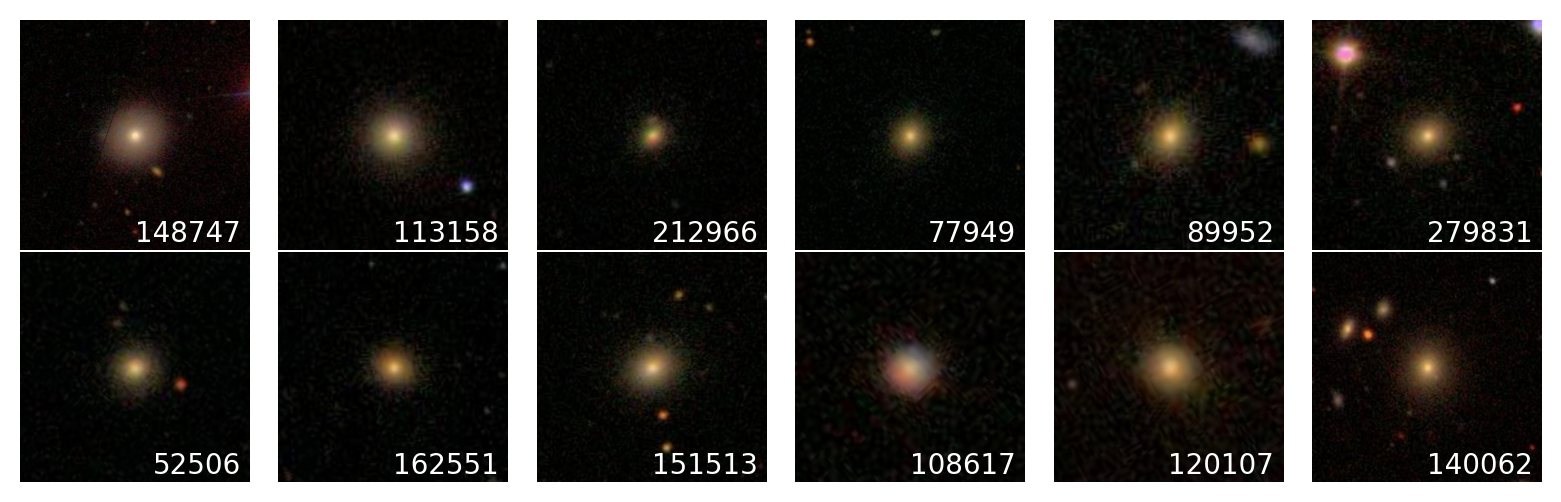

In [90]:
plot_samples(df_class0) # smooth round elliptical

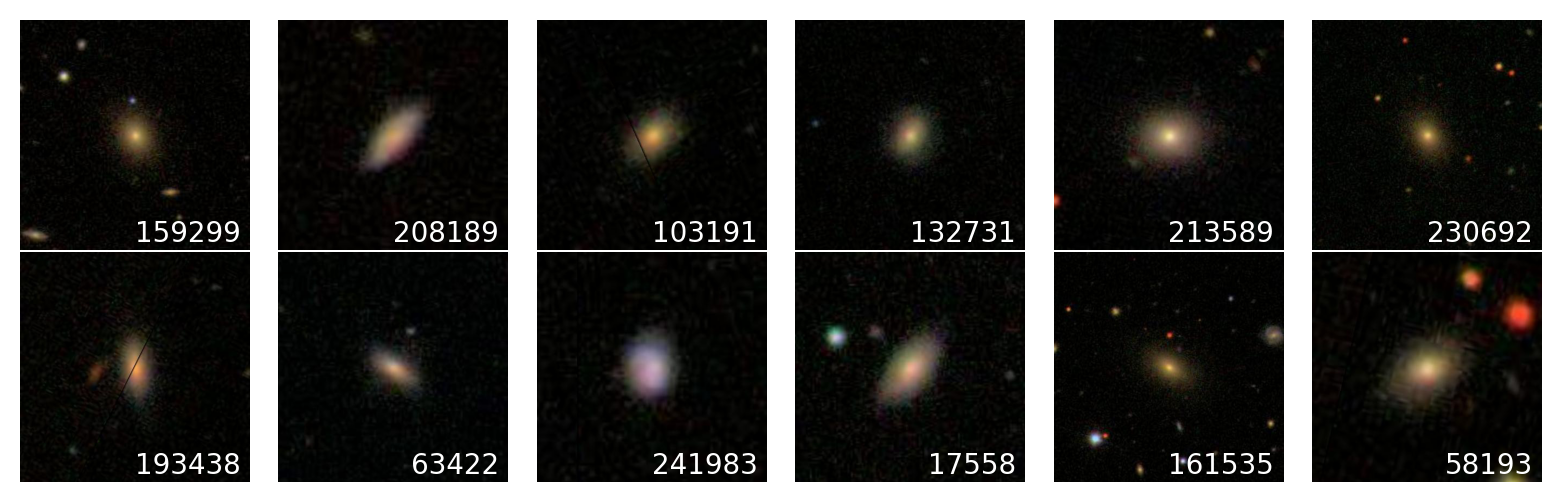

In [92]:
plot_samples(df_class1) # in-between smooth

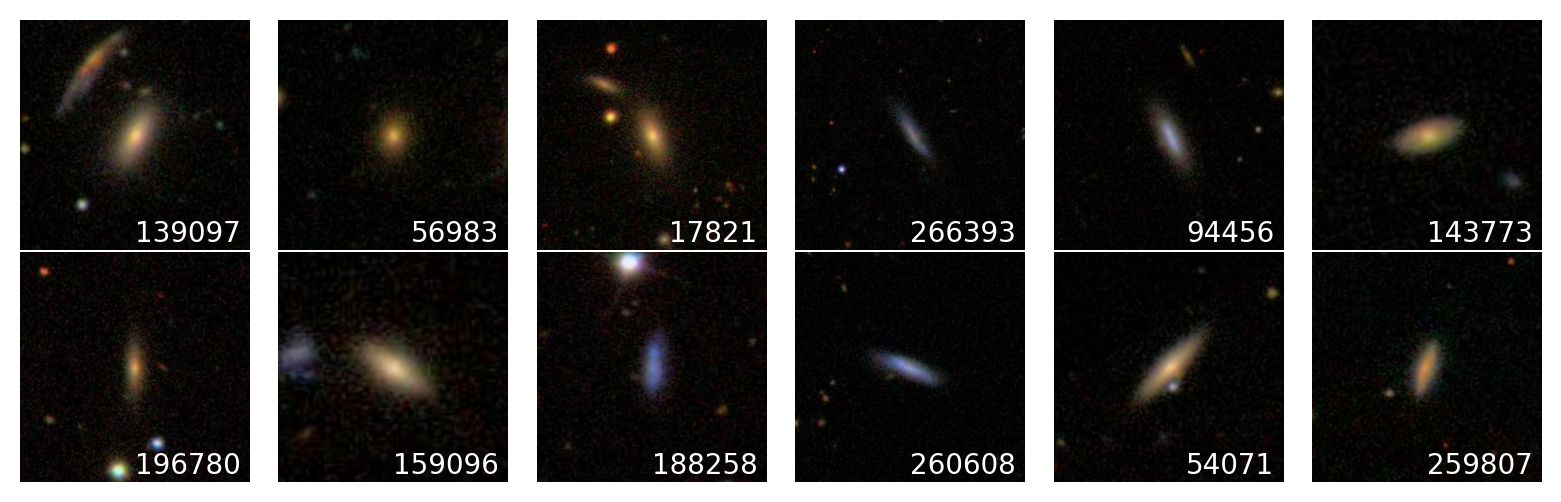

In [93]:
plot_samples(df_class2) # cigar-shaped smooth

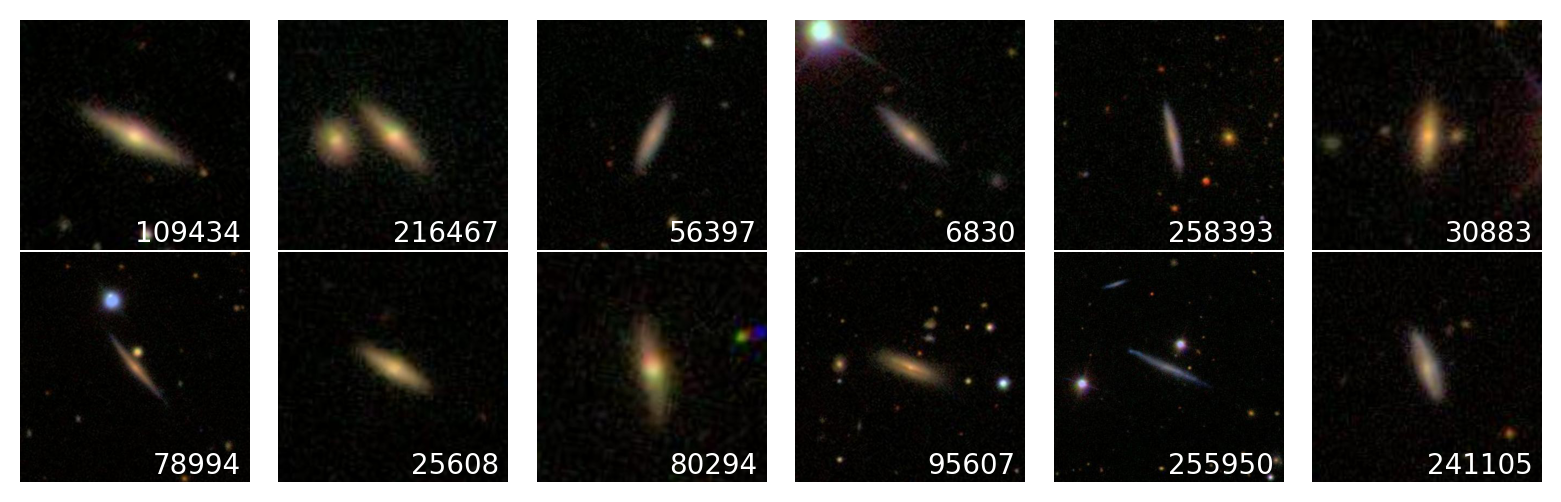

In [95]:
plot_samples(df_class3) #lenticulars

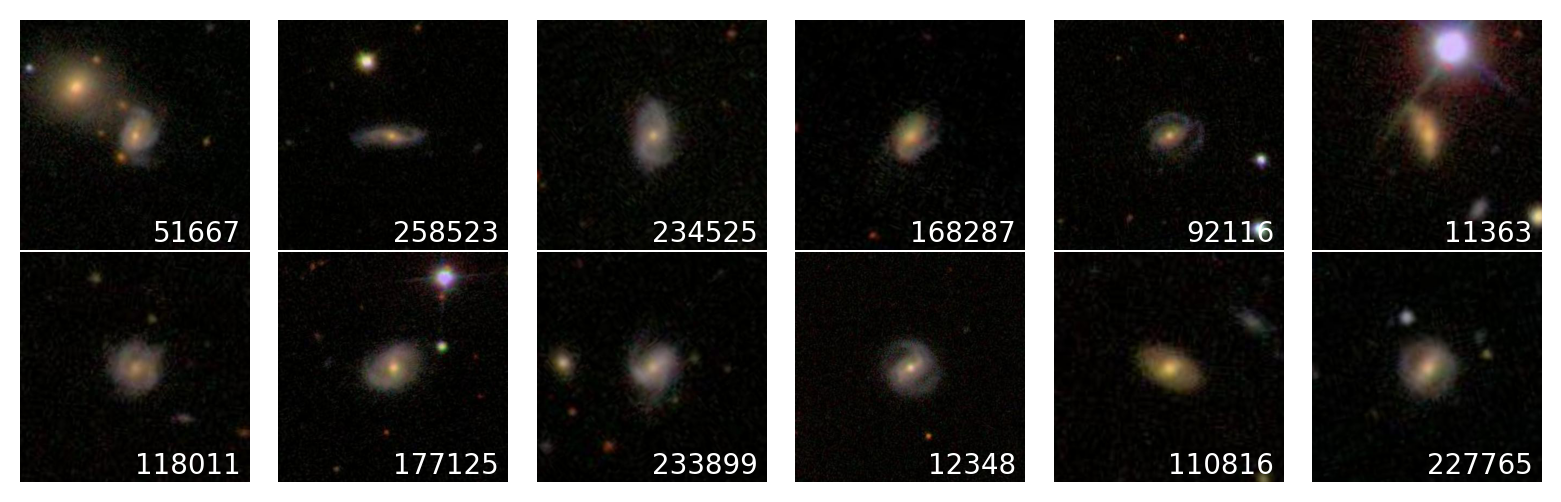

In [96]:
plot_samples(df_class4) # barred spirals

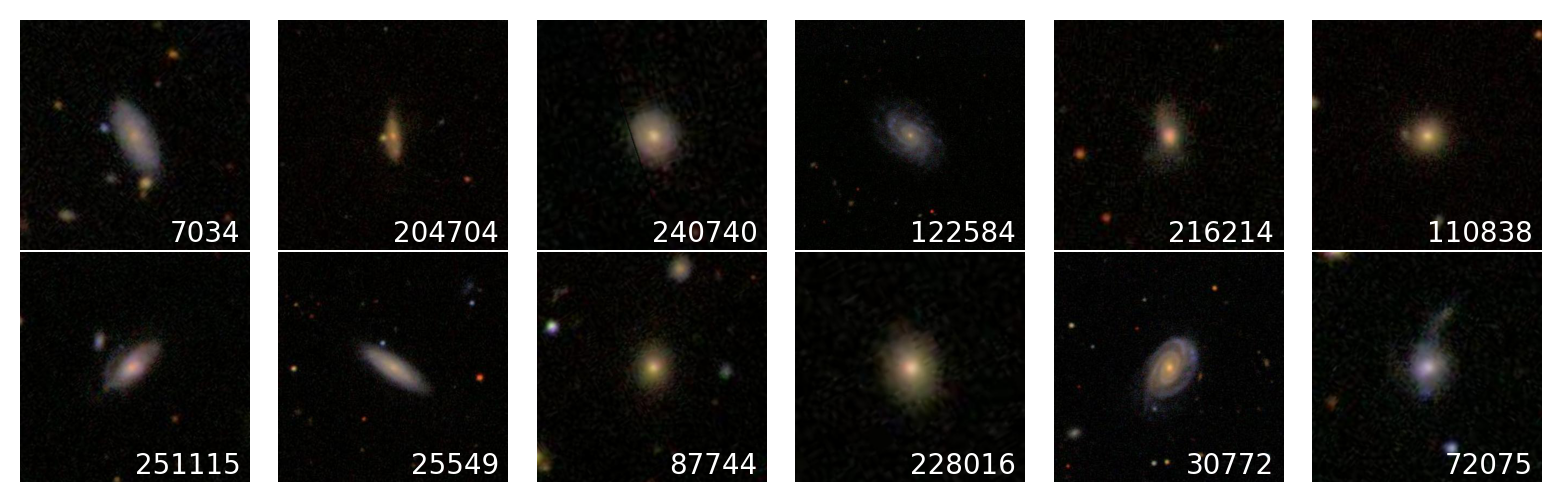

In [98]:
plot_samples(df_class5) # unbarred spirals

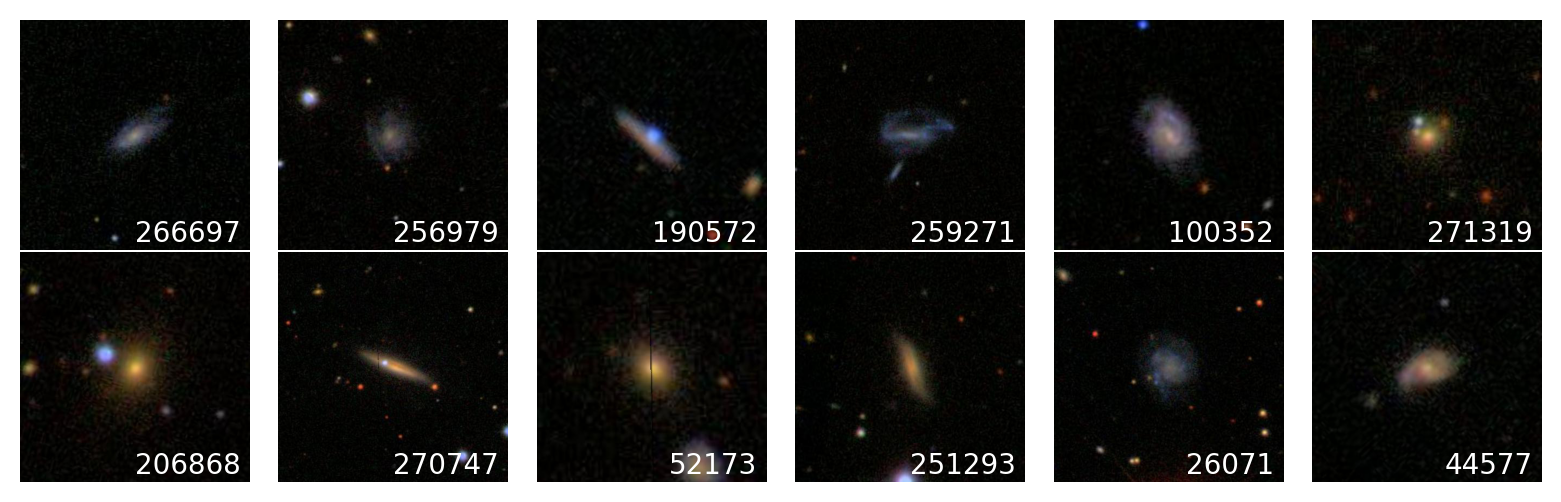

In [99]:
plot_samples(df_class6) # irregular

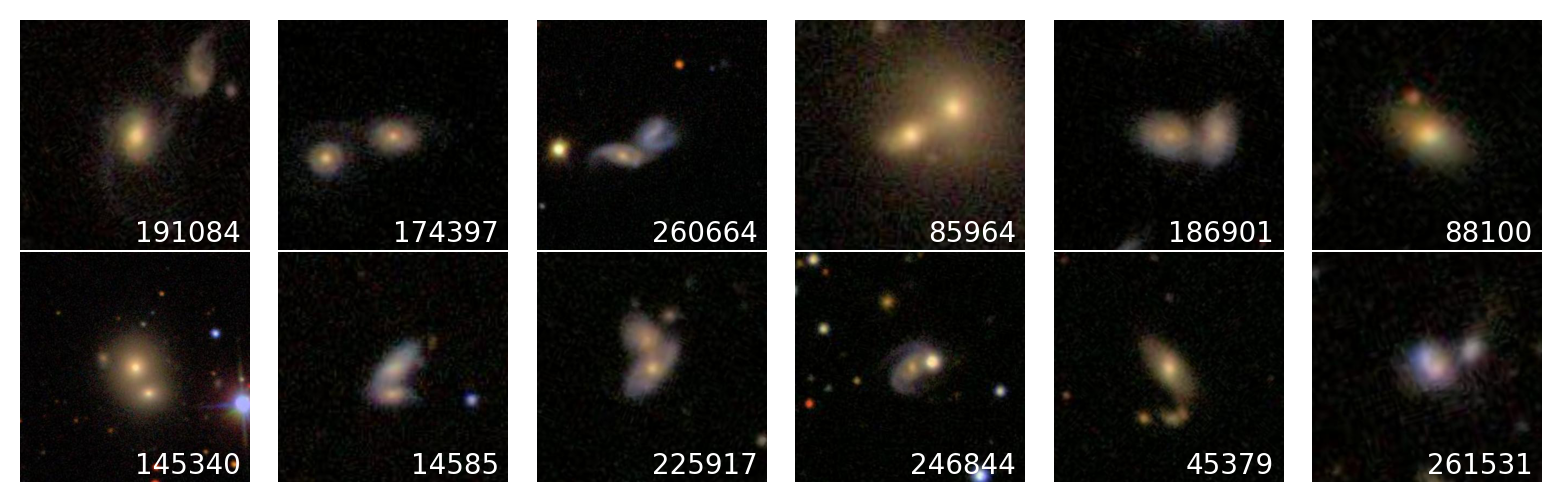

In [108]:
plot_samples(df_class7) # merger

(-0.5, 423.5, 423.5, -0.5)

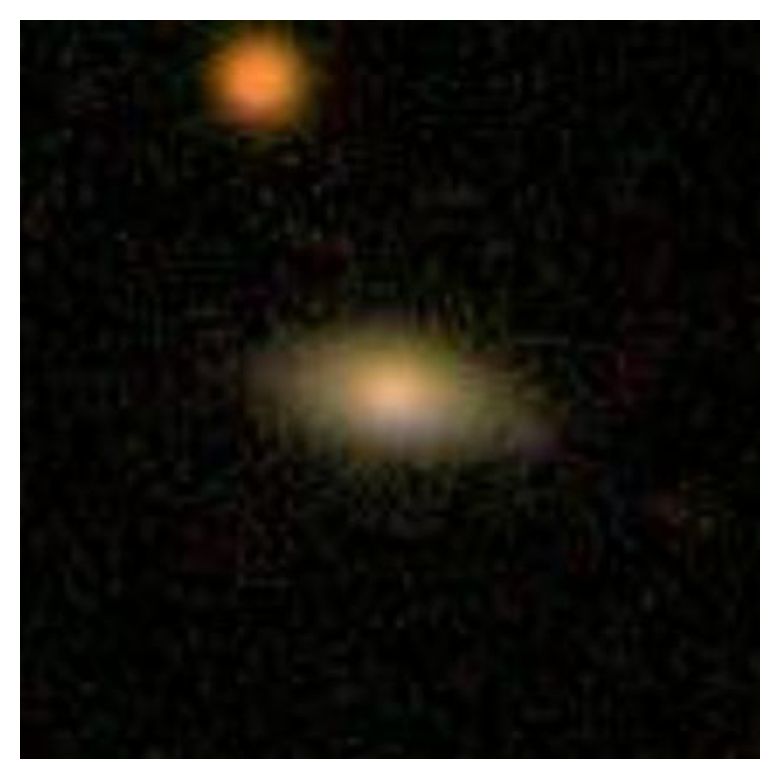

In [103]:
assetID = 8
current_IMG = plt.imread(dir_image+f'/{assetID}.jpg')
plt.imshow(current_IMG)
plt.axis('off')

In [106]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'DEVICE: {DEVICE}')

DEVICE: cpu


In [130]:
import os
import shutil
import pandas as pd

# File paths
dir_image = r'C:\Users\Admin\Desktop\Galaxy Morphology Project\archive\images_gz2\images'
output_dir = r'C:\Users\Admin\Desktop\Galaxy Morphology Project\filtered_images'
csv_file = "class7.csv"  # Path to your CSV file

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Load the CSV file
df_class7 = pd.read_csv(csv_file)

# Iterate over the asset_id column and transfer the images
for asset_id in df_class7['asset_id']:
    image_path = os.path.join(dir_image, f'{asset_id}.jpg')
    if os.path.exists(image_path):
        # Copy the image to the output directory
        shutil.copy2(image_path, output_dir)

print(f"All images from df_class7 have been copied to: {output_dir}")


All images from df_class7 have been copied to: C:\Users\Admin\Desktop\Galaxy Morphology Project\filtered_images


In [138]:
image_count = len([file for file in os.listdir(output_dir) if file.endswith('.jpg')])

print(f"The total number of images in '{output_dir}' is {image_count}")

The total number of images in 'C:\Users\Admin\Desktop\Galaxy Morphology Project\filtered_images' is 2977
